<a href="https://colab.research.google.com/github/draglar/Football-predictions/blob/main/IP_Week_6_Core_Ian_Muigai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 

## 1. Defining the Question

### Specifying the Question

I have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly

###  Defining the Metric for Success

> I can predict the outcomes

## The data

Two datasets were provided: https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc

 Some descriptions include
* Rank
* Country Abbreviation
* Total Points
* Previous Points
* Rank Change
* Average Previous Years Points
* Average Previous Years Points Weighted (50%)
* Average 2 Years Ago Points
* Average 2 Years Ago Points Weighted (30%)
* Average 3 Years Ago Points
* Average 3 Years Ago Points Weighted (20%)
* Confederation
* Date - date of the match
* Home_team - the name of the home team
* Away_team - the name of the away team
* Home_score - full-time home team score including extra time, not including penalty-shootouts
* Away_score - full-time away team score including extra time, not including penalty-shootouts
* Tournament - the name of the tournament
* City - the name of the city/town/administrative unit where the match was played
* Country - the name of the country where the match was played
* Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


## Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ranks=pd.read_csv('fifa_ranking.csv')
resul=pd.read_csv('results.csv')

In [2]:
ranks=pd.read_csv('https://raw.githubusercontent.com/nyamskamau/Fifa-Dataset-Week-6/main/fifa_ranking.csv')
resul=pd.read_csv('https://raw.githubusercontent.com/nyamskamau/Fifa-Dataset-Week-6/main/results.csv')

In [ ]:
ranks.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
resul.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
resul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


## Cleaning

#### changing time to date time

In [3]:
import datetime

In [4]:
ranks['rank_date']=pd.to_datetime(ranks.rank_date)
resul['date']     =pd.to_datetime(resul.date)

#### merging

In [5]:
ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [6]:
resul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


> The only common values in both datasets are: date and country names(including home and away team names)

In [7]:
ranks['country_full'].unique().shape

(216,)

In [8]:
resul['country'].unique().shape

(266,)

> There are too many values from the merge on country names (10246510 )

> Also the values of the dates do not match

In [9]:
(pd.DatetimeIndex(ranks.rank_date).year.unique()).shape

(26,)

In [10]:
(pd.DatetimeIndex(resul.date).year.unique()).shape

(148,)

> The scope of years is not the same and cant solely be used to merge the datasets

In [11]:
(pd.DatetimeIndex(ranks.rank_date).month.unique()).shape

(12,)

In [12]:
(pd.DatetimeIndex(ranks.rank_date).month.unique()).shape

(12,)

> Months are within scope

In [13]:
ranks['month']=pd.DatetimeIndex(ranks.rank_date).month
resul['month']=pd.DatetimeIndex(resul.date).month

ranks['year']=pd.DatetimeIndex(ranks.rank_date).year
resul['year']=pd.DatetimeIndex(resul.date).year

ranks['day']=pd.DatetimeIndex(ranks.rank_date).day
resul['day']=pd.DatetimeIndex(resul.date).day

> I merged on dates, however this does not match in the country names

>merging on country name and date
> countries names and dates match but the 950 rows? isnt that a tad bit too  small ..?

>This dataset contains countries that played and got ranked on the same day only, it doesnt take into account matches that were ranked at a later date

> so i did this onece before and realised it wasnt working out cause of the model variables

In [14]:
merge_1=pd.merge(ranks,resul,left_on=['country_full','month','year'],right_on=['home_team','month','year'],how='inner')
merge_2=pd.merge(ranks,resul,left_on=['country_full','month','year'],right_on=['away_team','month','year'],how='inner')

#merged=pd.concat([merge_1,merge_2])

In [15]:
away=merge_2[['date','rank','home_team','away_team']]

In [16]:
merged=(pd.merge(merge_1,away,left_on=['date','home_team','away_team'],right_on=['date','home_team','away_team'],how='inner'))

> This fits the description of the ranking dates and the countries matching

### Tidying the dataset

##### previewing the dataset

> Determining the no. of records in our dataset

In [17]:
merged.shape

(16957, 30)

> Previewing the top of our dataset

In [18]:
merged.head()

,rank_x,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y,rank_y
0,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,11,3
1,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Solna,Sweden,False,22,12
2,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False,22,70
3,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,29,67
4,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,14


> Previewing the top of our dataset

In [19]:
merged.tail()

,rank_x,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year,day_x,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,day_y,rank_y
16952,137,Angola,ANG,209.08,221,1,114.90,114.90,50.82,25.41,107.40,32.22,182.75,36.55,CAF,2018-06-07,6,2018,7,2018-06-01,Angola,Malawi,0,0,COSAFA Cup,Polokwane,South Africa,True,1,123
16953,139,Botswana,BOT,204.52,195,3,79.64,79.64,67.76,33.88,223.42,67.03,119.88,23.98,CAF,2018-06-07,6,2018,7,2018-06-01,Botswana,Mauritius,6,0,COSAFA Cup,Polokwane,South Africa,True,1,155
16954,147,Lesotho,LES,175.48,172,3,78.24,78.24,108.80,54.40,63.33,19.00,119.20,23.84,CAF,2018-06-07,6,2018,7,2018-06-06,Lesotho,Zimbabwe,0,0,COSAFA Cup,Polokwane,South Africa,True,6,118
16955,160,Barbados,BRB,127.07,129,-2,54.64,54.64,0.00,0.00,141.95,42.59,149.22,29.84,CONCACAF,2018-06-07,6,2018,7,2018-06-03,Barbados,Belize,0,0,Friendly,Bridgetown,Barbados,False,3,163
16956,184,Malta,MLT,65.11,62,1,29.90,29.90,11.74,5.87,64.57,19.37,49.85,9.97,UEFA,2018-06-07,6,2018,7,2018-06-01,Malta,Georgia,0,1,Friendly,Schwaz,Austria,True,1,96


##### Checking for null and duplicates

In [20]:
merged.isna().sum()

rank_x                     0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
month                      0
year                       0
day_x                      0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
day_y                      0
rank_y                     0
dtype: int64

There were no null values

In [21]:
merged.duplicated().sum()

53

In [22]:
merged.drop_duplicates(inplace=True)

> The 53 duplicates were dropped

##### Renaming and droping columns

In [23]:
merged=merged.rename(columns ={
        'day_x':'ranked_day',
        'day_y':'match_day',
        'rank_x':'home_rank',
        'rank_y':'away_rank'
    })

In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16904 entries, 0 to 16956
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   home_rank                16904 non-null  int64         
 1   country_full             16904 non-null  object        
 2   country_abrv             16904 non-null  object        
 3   total_points             16904 non-null  float64       
 4   previous_points          16904 non-null  int64         
 5   rank_change              16904 non-null  int64         
 6   cur_year_avg             16904 non-null  float64       
 7   cur_year_avg_weighted    16904 non-null  float64       
 8   last_year_avg            16904 non-null  float64       
 9   last_year_avg_weighted   16904 non-null  float64       
 10  two_year_ago_avg         16904 non-null  float64       
 11  two_year_ago_weighted    16904 non-null  float64       
 12  three_year_ago_avg       16904 n

In [25]:
merged.confederation.unique()

array(['UEFA', 'CONMEBOL', 'AFC', 'CAF', 'CONCACAF', 'OFC'], dtype=object)

In [26]:
merged.tournament.unique()

array(['Friendly', 'FIFA World Cup qualification',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'African Cup of Nations',
       'CFU Caribbean Cup qualification', 'UEFA Euro qualification',
       'CFU Caribbean Cup', 'Kirin Cup', 'FIFA World Cup', 'Baltic Cup',
       'Oceania Nations Cup qualification', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Dynasty Cup', "King's Cup",
       'SAFF Cup', 'Copa Paz del Chaco', 'USA Cup', 'Korea Cup',
       'Copa América', 'Merdeka Tournament', 'South Pacific Games',
       'UNCAF Cup', 'Oceania Nations Cup', 'Windward Islands Tournament',
       'Gold Cup', 'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'King Hassan II Tournament', 'AFC Asian Cup',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',
      

In [27]:
merged.drop(['confederation','country_abrv','country'],axis=1,inplace=True)

##### Renaming tournament type

> The question asks for Tournament type (World cup, Friendly, Other)

In [28]:
(merged.tournament.str.split(' ',expand=True))[0].unique()

array(['Friendly', 'FIFA', 'African', 'Amílcar', 'United', 'Malta', 'CFU',
       'UEFA', 'Kirin', 'Baltic', 'Oceania', 'Gulf', 'Simba', 'CECAFA',
       'Dynasty', "King's", 'SAFF', 'Copa', 'USA', 'Korea', 'Merdeka',
       'South', 'UNCAF', 'Windward', 'Gold', 'AFC', 'Lunar', 'AFF',
       'King', 'Cyprus', 'Dunhill', 'Nehru', 'COSAFA', 'Tournoi',
       'Confederations', 'UAFA', 'UNIFFAC', 'Nordic', 'WAFF',
       'Millennium', 'Prime', 'SKN', 'EAFF', 'VFF', 'Dragon', 'Nile',
       'Nations', 'Pacific', 'ABCS', 'OSN', 'Intercontinental'],
      dtype=object)

In [29]:
merged.tournament.str.contains('World','cup').value_counts()

False    12786
True      4118
Name: tournament, dtype: int64

In [30]:
merged['tournament'][merged.tournament.str.contains('World','cup')==True]='world cup'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
merged.tournament[merged.tournament.str.contains('world cup')==True].value_counts()

world cup    4118
Name: tournament, dtype: int64

In [32]:
merged.tournament[merged.tournament.str.contains('Friendly','friendly')==True].value_counts()

Friendly    6436
Name: tournament, dtype: int64

In [33]:
merged['tournament'][~((merged.tournament.str.contains('Friendly')==True)|(merged.tournament.str.contains('world cup')==True))]='other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
merged.tournament.value_counts()

Friendly     6436
other        6350
world cup    4118
Name: tournament, dtype: int64

### External Data Source Validation

> A more detailed explanation and history of the rankings is available here: https://en.wikipedia.org/wiki/FIFA_World_Rankings


> An explanation of the ranking procedure is available here: https://www.fifa.com/fifa-world-ranking/procedure/men


## EDA

In [ ]:
merged.info(  )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16904 entries, 0 to 16956
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   home_rank                16904 non-null  int64         
 1   country_full             16904 non-null  object        
 2   total_points             16904 non-null  float64       
 3   previous_points          16904 non-null  int64         
 4   rank_change              16904 non-null  int64         
 5   cur_year_avg             16904 non-null  float64       
 6   cur_year_avg_weighted    16904 non-null  float64       
 7   last_year_avg            16904 non-null  float64       
 8   last_year_avg_weighted   16904 non-null  float64       
 9   two_year_ago_avg         16904 non-null  float64       
 10  two_year_ago_weighted    16904 non-null  float64       
 11  three_year_ago_avg       16904 non-null  float64       
 12  three_year_ago_weighted  16904 n

#### univariate

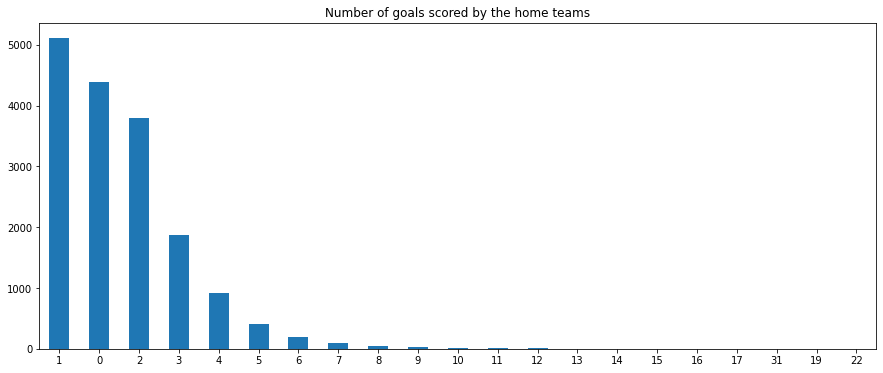

In [ ]:
merged.home_score.value_counts().plot(kind='bar',rot=0,title='Number of goals scored by the home teams',figsize=(15,6))

> Most of the home teams scored 1 goal during the matches 

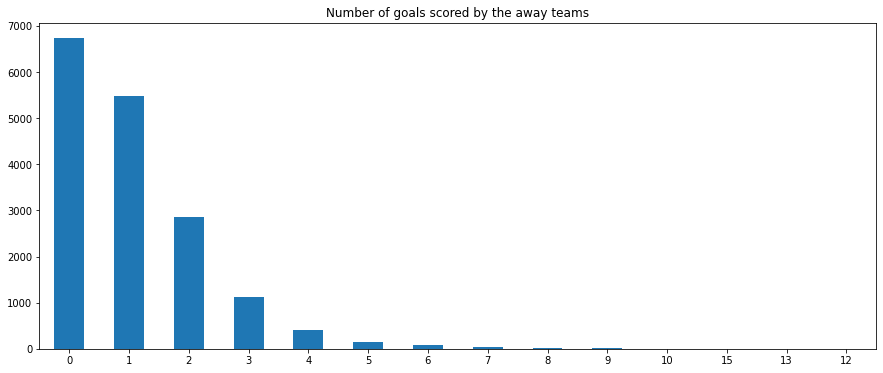

In [ ]:
merged.away_score.value_counts().plot(kind='bar',rot=0,title='Number of goals scored by the away teams',figsize=(15,6))

> Most of the away teams scored no goal during the matches 

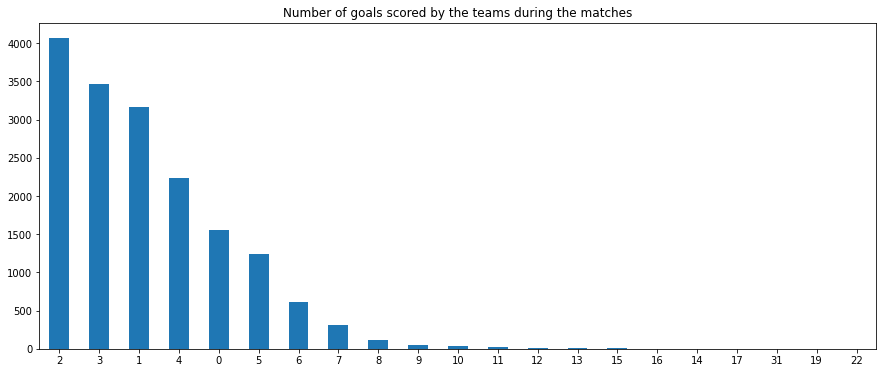

In [ ]:
total_goals_scored=merged['away_score']+merged['home_score']
total_goals_scored.value_counts().plot(kind='bar',rot=0,title='Number of goals scored by the teams during the matches',figsize=(15,6))

> Most matches ended with a total of 2 goals scored by both teams

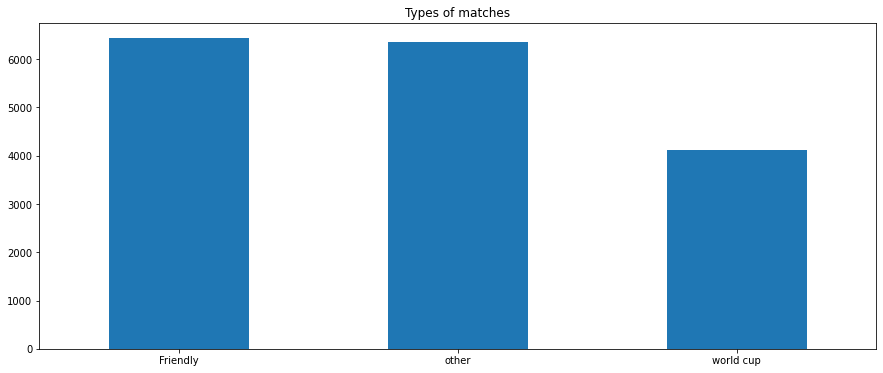

In [ ]:
merged.tournament.value_counts().plot(kind='bar',rot=0,title='Types of matches',figsize=(15,6))

> The least matches in the dataset were World cup matches followed by Friendlies then the most were matches not in these two categories.

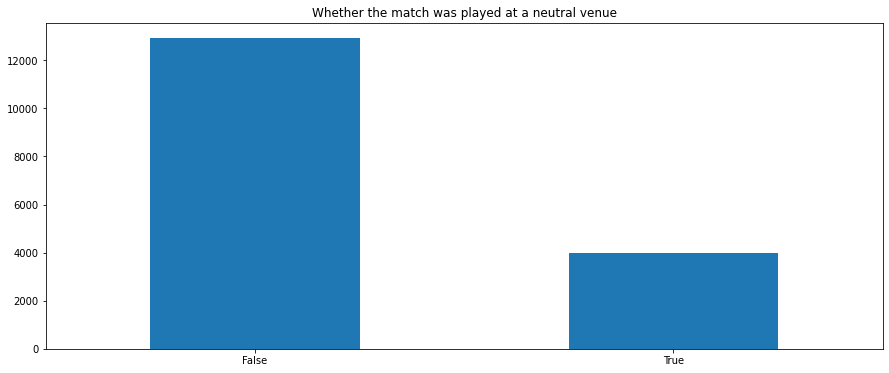

In [ ]:
merged.neutral.value_counts().plot(kind='bar',rot=0,title='Whether the match was played at a neutral venue',figsize=(15,6))

> Most matches were not layed at a neutral venue

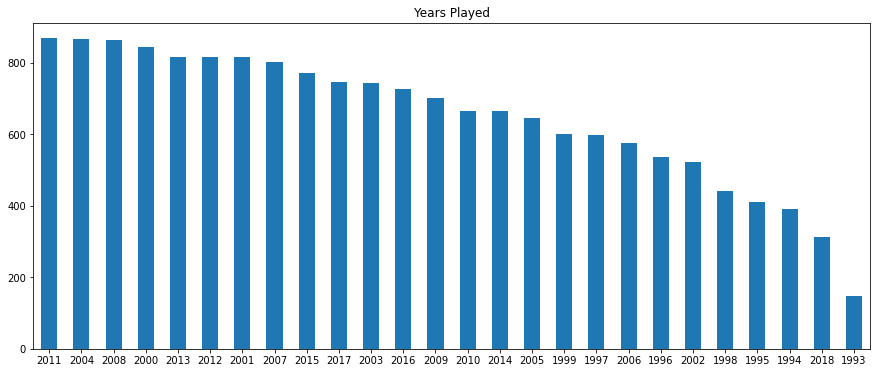

In [ ]:
merged.year.value_counts().plot(kind='bar',rot=0,title='Years Played',figsize=(15,6))

> Most games in the dataset were played in 2011

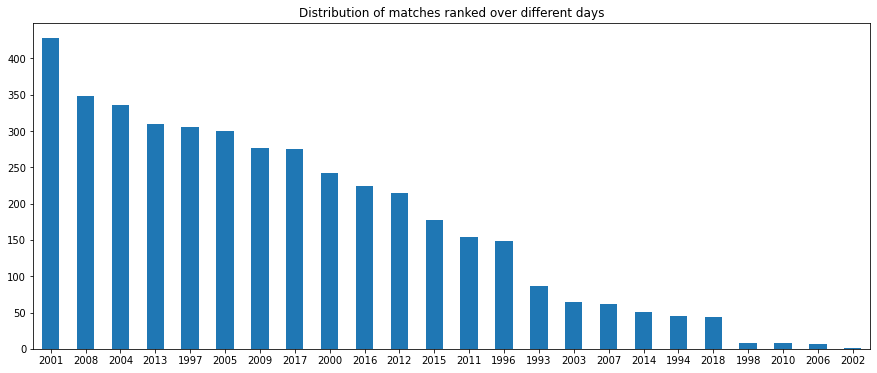

In [ ]:
merged.year[merged.tournament=='world cup'].value_counts().plot(kind='bar',rot=0,title='Distribution of matches ranked over different days',figsize=(15,6))

> Most world cup matches were played in 2001

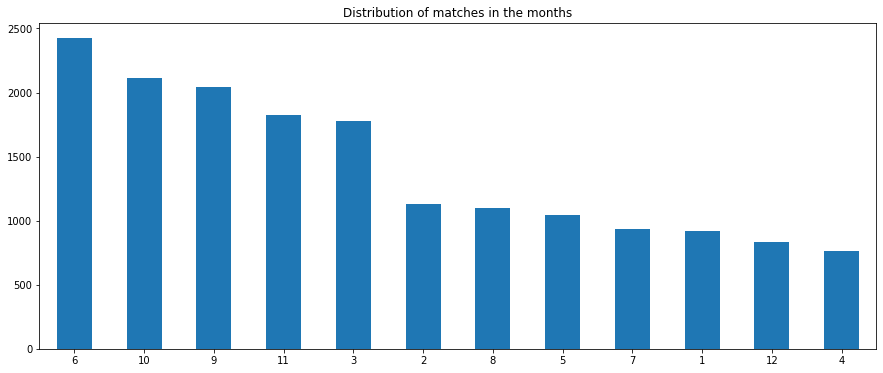

In [ ]:
merged.month.value_counts().plot(kind='bar',rot=0,title='Distribution of matches in the months',figsize=(15,6))

> Most of the matches were played during October, September and November

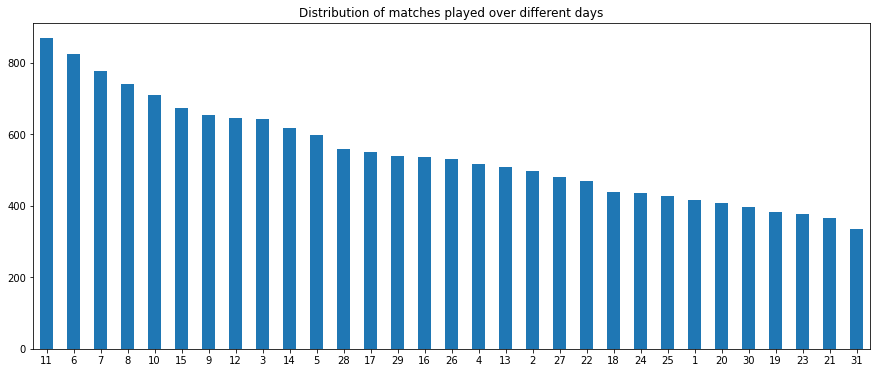

In [ ]:
merged.match_day.value_counts().plot(kind='bar',rot=0,title='Distribution of matches played over different days',figsize=(15,6))

> most matches were played on the 6 th day of the month

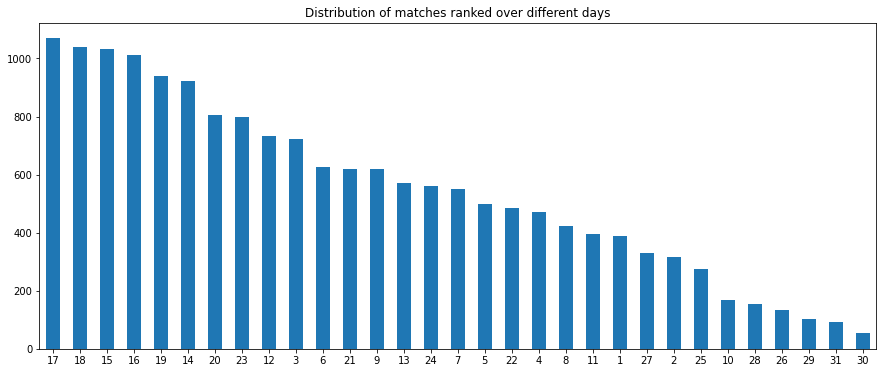

In [ ]:
merged.ranked_day.value_counts().plot(kind='bar',rot=0,title='Distribution of matches ranked over different days',figsize=(15,6))

> Most matches were rankes on the 18 th to 20 th days of the months

#### Bivariate

In [ ]:
merged[~(merged['country_full']==merged['home_team'])]

,home_rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,rank_date,month,year,ranked_day,date,home_team,away_team,home_score,away_score,tournament,city,neutral,match_day,away_rank


In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
heat=merged.drop(['rank_date','date'],axis=1)
heat['country_full']=le.fit_transform(heat['country_full'])
heat['neutral']=le.fit_transform(heat['neutral'])
heat['home_team']=le.fit_transform(heat['home_team'])
heat['away_team']=le.fit_transform(heat['away_team'])
heat['tournament']=le.fit_transform(heat['tournament'])
heat['city']=le.fit_transform(heat['city'])

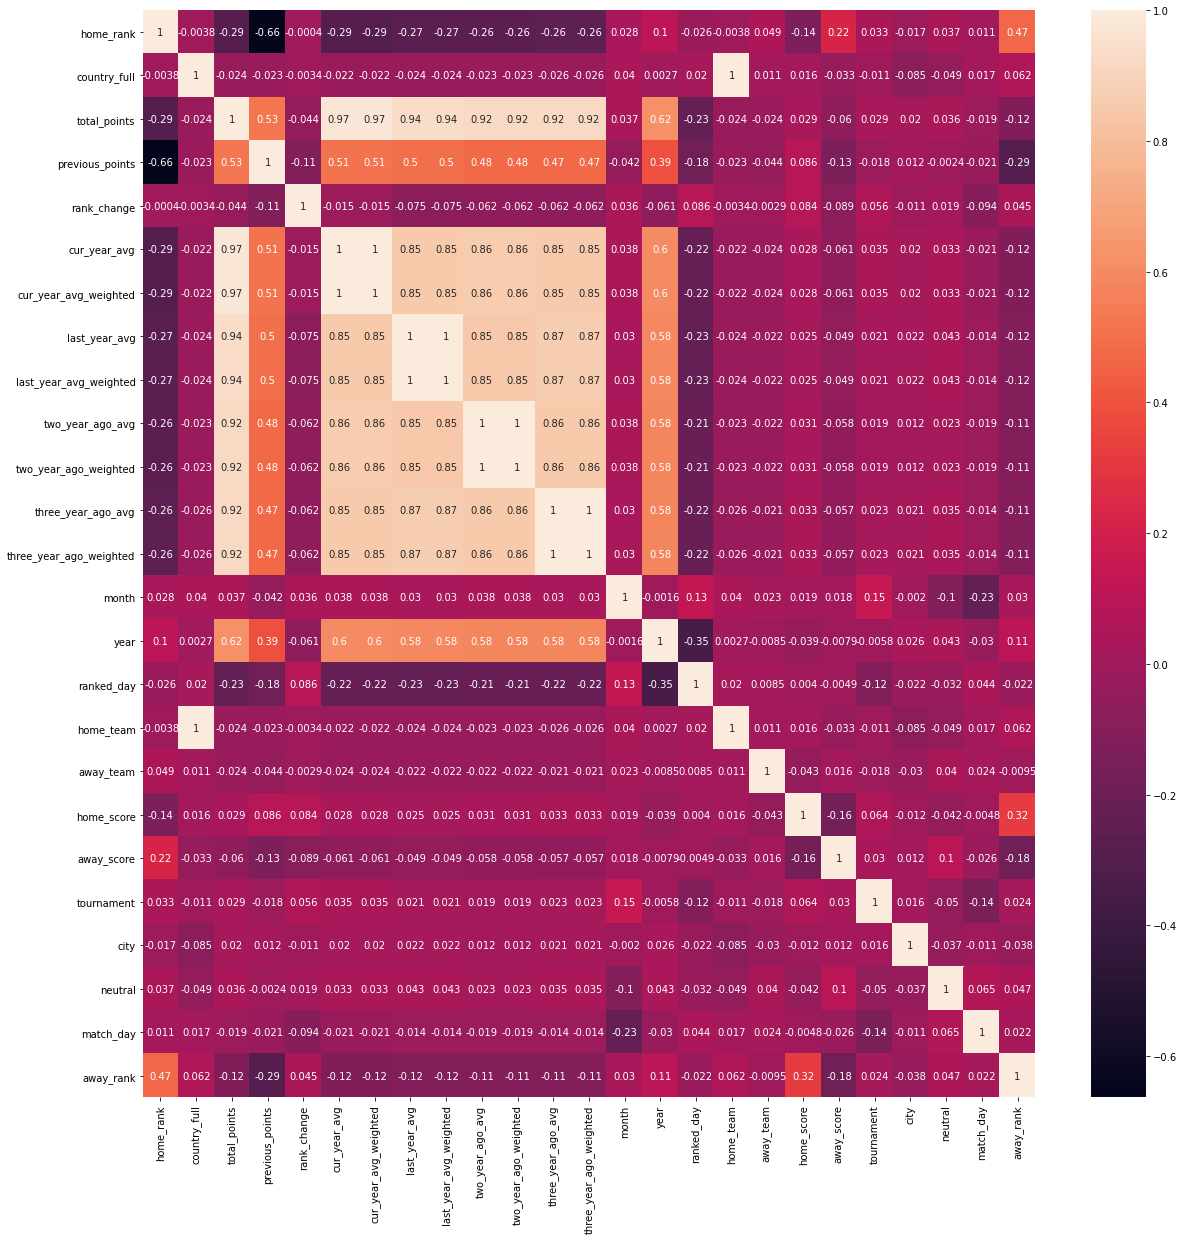

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(heat.corr(),annot=True)

> The averages and weighted averages have a high correlation because each weighted average is calculated from the average

> The total points is highly correlated with the current year because the points are directly proporional to the current Years Points

> The home team and coutry dont have a correlation of 1 because there were counties that hosted the matches as neutral grounds.

>

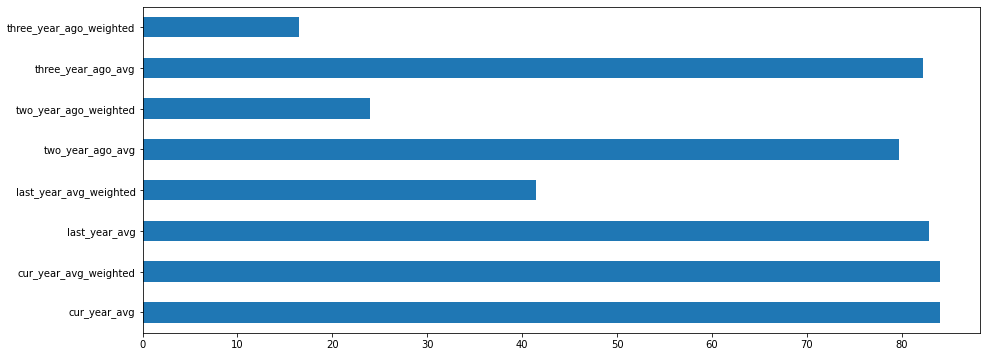

In [ ]:
merged[['cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted']].mean().plot(kind='barh',figsize=(15,6))

> the averages weighted averages have been increasing over the years.
* The weighted averages have had a dramatic increase while the averages have a very minimal change over the years.

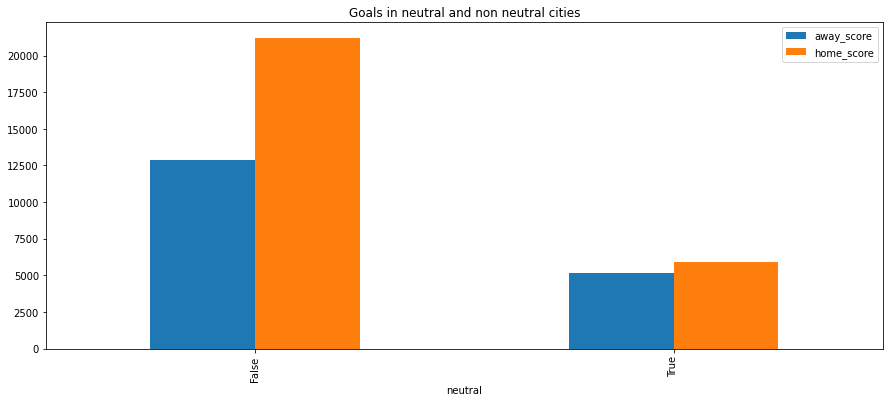

In [ ]:
pd.pivot_table(merged,index='neutral',values=['home_score','away_score'],aggfunc='sum').plot(kind='bar',title='Goals in neutral and non neutral cities',figsize=(15,6))

> more goals were scored by the home teams in their home ground.

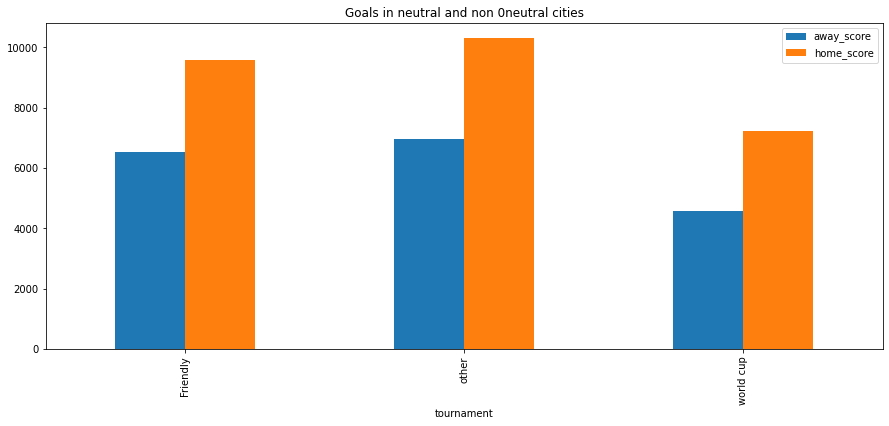

In [ ]:
pd.pivot_table(merged,index='tournament',values=['home_score','away_score'],aggfunc='sum').plot(kind='bar',title='Goals in neutral and non 0neutral cities',figsize=(15,6))

> Home teams generally won in every tournament type however uncategorised tournaments registered the highest number of home team wins

## Implementing the solution

### Polynomial Regression

> Train models given:
 *  Rank of home team
 *  Rank of away team
 *  Tournament type

 > For both models i will use the same set of home team ,away team ranks and tournament type : 15, 32, Friendly

importing the necessary liblaries for a polynomial regression

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

from sklearn.model_selection import KFold #for cross validation
import scipy as sp #For homogenuity

> Creating encoded values of tournament type

In [137]:
x=merged[['home_rank','away_rank','tournament']]
print(x['tournament'].value_counts())
x['tournament']=le.fit_transform(x['tournament'])


Friendly     6436
other        6350
world cup    4118
Name: tournament, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


> Tournament Encodings
* Friendly : 0
* Other    : 1
* World cup: 2 

In [48]:
x['tournament'].value_counts()

0    6436
1    6350
2    4118
Name: tournament, dtype: int64

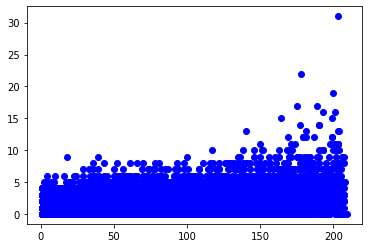

In [51]:
plt.scatter(x['away_rank'], y, color='blue') 

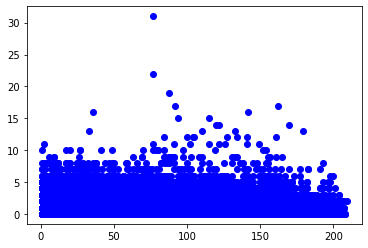

In [52]:
plt.scatter(x['home_rank'], y, color='blue') 

> Both the scater plots show a linear distribution

###### Multicoleniarity

In [53]:
correlations = x.corr()
correlations

,home_rank,away_rank,tournament
home_rank,1.000000,0.469454,0.032581
away_rank,0.469454,1.000000,0.024374
tournament,0.032581,0.024374,1.000000


In [54]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_rank,away_rank,tournament
home_rank,1.283423,-0.601846,-0.027146
away_rank,-0.601846,1.282823,-0.011659
tournament,-0.027146,-0.011659,1.001169


> The variables are not colinear since most are close to 1

#### Model 1: Predict how many goals the home team scores.

In [138]:
y=merged['home_score']

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
list(regressor.coef_)

[-0.01157701766560347, 0.014931792066061988, 0.1276283703206576]

The tournament has the largest weight on the home team score

In [140]:
y_pred=regressor.predict(x_test)
comp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comp.describe()

,Actual,Predicted
count,5072.000000,5072.000000
mean,1.610607,1.617428
std,1.665829,0.724465
min,0.000000,-0.903185
25%,0.000000,1.149684
50%,1.000000,1.577762
75%,2.000000,2.059840
max,31.000000,4.385110


> The mean is realy close but the minimum and maximum values are way too off

In [141]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.056246049825795
Mean Squared Error: 2.1937902540638485
Root Mean Squared Error: 1.4811449132559071


In [142]:
regressor.predict([[15,32,0]])

array([1.50218689])

> The model predicted aa value of 1.50 goals which implies there is a 100% chance of the home team scoring 1 goal and a 50 % chance of scoring a second goal

In [143]:
x = x.values
y = y.values

folds = KFold(n_splits=10)

rmses = []
count = 1
for train, test in folds.split(x):
  x_train, x_test = x[train], x[test]
  y_train, y_test = y[train], y[test]

  regressor = LinearRegression()  
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_test)
  
  rmse =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  rmses.append(rmse)
  
  print('Model',count,' Root Mean Squared Error:',rmse)
  count = count + 1

Model 1  Root Mean Squared Error: 1.3421207400620077
Model 2  Root Mean Squared Error: 1.609625829043855
Model 3  Root Mean Squared Error: 1.7665496414758457
Model 4  Root Mean Squared Error: 1.436854163426237
Model 5  Root Mean Squared Error: 1.3251998685422919
Model 6  Root Mean Squared Error: 1.3951157096576028
Model 7  Root Mean Squared Error: 1.3845812288240467
Model 8  Root Mean Squared Error: 1.353648711728373
Model 9  Root Mean Squared Error: 1.3111538482629763
Model 10  Root Mean Squared Error: 1.3877783504639873


> I used a kfold to see if my RMSE was within scope or was too off, and yes it was within the scope of the 10 models

In [144]:
polynomial =PolynomialFeatures(degree=6)
poly_fit =polynomial.fit_transform(x)

regression = LinearRegression()
regression.fit(poly_fit, y)

y_pred=regression.predict(poly_fit)
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Root Mean Squared Error : 1.3971837740547113


In [102]:
regression.predict(polynomial.fit_transform([[15,32,0]]))

array([0.80396519])

> The model predicted aa value of 1.54 goals which implies there is a 100% chance of the home team scoring 1 goal and a 54 % chance of scoring a second goal

>This could be because the plots are scattered Linearly so the polynomial model and linear models were quite similar

##### Residuals

In [145]:
residuals = np.subtract(y_pred, y)
pd.DataFrame(residuals).describe()

,0
count,1.690400e+04
mean,1.038794e-12
std,1.397225e+00
min,-2.520694e+01
25%,-6.947588e-01
50%,1.986699e-01
75%,9.220857e-01
max,5.092537e+00


In [146]:
residuals.mean()

1.0382397996494601e-12

1.038239e-12 == 6.3791 *10^-6

> Our mean is really close to 0 , indicating that we are fairly correct, although slightly over estimating chances.

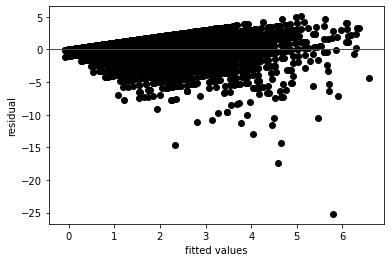

In [147]:
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

> the residuals are centered around the mean.

##### Homogenuity

> Testing heteroskedasticity using the Barlett test our null hypothesis is that the data has equal variance

In [117]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Interpreting the results by computing the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
crit = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(crit,test_result)
if (test_result > crit):
  print('Unequal variances, the model should be reassessed')
else:
  print('Constant variance , accept null hypothesis')

inf 7703.195775841209
Constant variance , accept null hypothesis


#### Model 2: Predict how many goals the away team scores.

In [119]:
y=merged['away_score']

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
list(regressor.coef_)

[0.009445421927017947, -0.008789882301529738, 0.05033341965152917]

> The tournament type has a the highest weight on the score of the away team

In [121]:
y_pred=regressor.predict(x_test)
comp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comp.describe()

,Actual,Predicted
count,5072.000000,5072.000000
mean,1.059345,1.055586
std,1.251238,0.482313
min,0.000000,-0.744931
25%,0.000000,0.752912
50%,1.000000,1.039372
75%,2.000000,1.338884
max,15.000000,3.019721


> The mean values are really similar

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8514052444037754
Mean Squared Error: 1.3258612669636043
Root Mean Squared Error: 1.1514604930103352


In [122]:
regressor.predict([[15,32,0]])

array([0.85941642])

> The model predicted a value of 0.85 goals which implies there is a 85% chance of the away team scoring 1 goal

> cross validation with kfold

In [123]:
x = x.values
y = y.values

folds = KFold(n_splits=10)

rmses = []
count = 1
for train, test in folds.split(x):
  x_train, x_test = x[train], x[test]
  y_train, y_test = y[train], y[test]

  regressor = LinearRegression()  
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_test)
  
  rmse =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  rmses.append(rmse)
  
  print('Model',count,' Root Mean Squared Error:',rmse)
  count = count + 1

Model 1  Root Mean Squared Error: 1.1673766317380552
Model 2  Root Mean Squared Error: 1.1245414865638796
Model 3  Root Mean Squared Error: 1.2099760295954323
Model 4  Root Mean Squared Error: 1.146206769377226
Model 5  Root Mean Squared Error: 1.1678853875025297
Model 6  Root Mean Squared Error: 1.199350625045983
Model 7  Root Mean Squared Error: 1.0844049874053858
Model 8  Root Mean Squared Error: 1.1600531366440323
Model 9  Root Mean Squared Error: 1.1042392667682992
Model 10  Root Mean Squared Error: 1.0913164638536237


> I used a kfold to see if my RMSE was within scope or was too off, and yes it was within the scope of the 10 models

In [124]:
polynomial =PolynomialFeatures(degree=6)
poly_fit =polynomial.fit_transform(x)

regression = LinearRegression()
regression.fit(poly_fit, y)

y_pred=regression.predict(poly_fit)
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Root Mean Squared Error : 1.11537865592265


In [125]:
regression.predict(polynomial.fit_transform([[15,32,0]]))

array([0.80396519])

> The model predicted aa value of 0.80 goals which implies there is a 80% chance of the away team scoring 1 goal

###### Residuals

In [126]:
residuals = np.subtract(y_pred, y)
pd.DataFrame(residuals).describe()


,0
count,1.690400e+04
mean,8.028613e-13
std,1.115412e+00
min,-1.198842e+01
25%,-5.140630e-01
50%,1.684865e-01
75%,7.767335e-01
max,4.247735e+00


In [136]:
residuals.mean()

8.025078734790501e-13

8.025078e-13 == 0.000018139
>  Our mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 0.17%

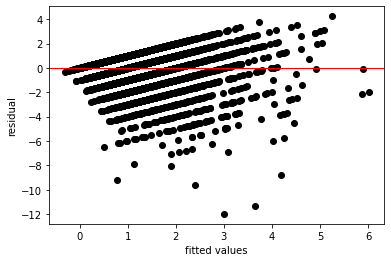

In [128]:
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

> the residuals are centered around the mean.
The data also looks like there is a pattern

##### Homogenuity

> Testing heteroskedasticity using the Barlett test our null hypothesis is that the data has equal variance

In [130]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Interpreting the results by computing the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
crit = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(crit,test_result)
if (test_result > crit):
  print('Unequal variances, the model should be reassessed')
else:
  print('Constant variance , accept null hypothesis')

inf 7703.195775841209
Constant variance , accept null hypothesis


### Logistic Regresion

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
logics=merged[['home_team','home_score','away_team','away_score','year','home_rank','away_rank','tournament']]
logics

,home_team,home_score,away_team,away_score,year,home_rank,away_rank,tournament
0,Sweden,1,Switzerland,2,1993,4,3,Friendly
1,Sweden,1,France,1,1993,4,12,world cup
2,Argentina,2,Peru,1,1993,5,70,world cup
3,Argentina,0,Paraguay,0,1993,5,67,world cup
4,Brazil,1,Mexico,1,1993,8,14,Friendly
...,...,...,...,...,...,...,...,...
16952,Angola,0,Malawi,0,2018,137,123,other
16953,Botswana,6,Mauritius,0,2018,139,155,other
16954,Lesotho,0,Zimbabwe,0,2018,147,118,other
16955,Barbados,0,Belize,0,2018,160,163,Friendly


Creating Dummies for the tournament column

In [ ]:
tournamnt = pd.get_dummies(logics['tournament'],drop_first=True)
logics.drop('tournament',axis=1,inplace=True)
logics=pd.concat([logics,tournamnt],axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


label encoding the status column 

In [ ]:
def status(x,y):
  if x>y:
    return 'win'
  elif x<y:
    return 'lost'
  else:
    return 'draw'

In [ ]:
logics['status']=logics.apply(lambda x: status(x['home_score'],x['away_score']),axis=1)

In [ ]:
logics['status']=le.fit_transform(logics['status'])

> Label encodings
*  Draw =0
*  lost =1
*  Won  =2

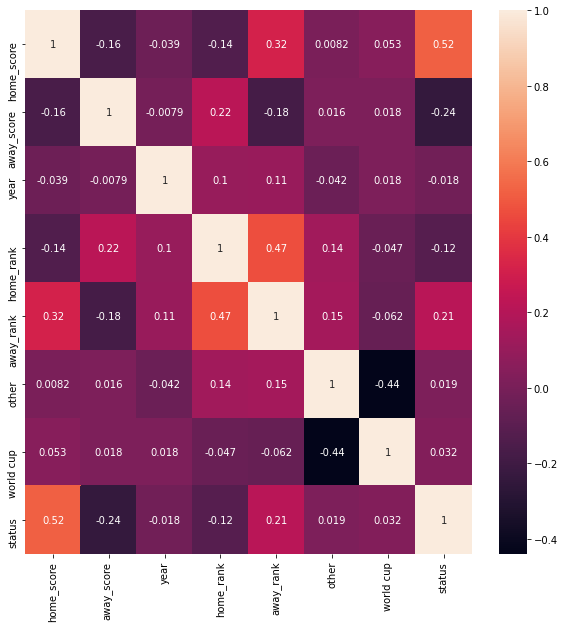

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(logics.corr(),annot=True)

> There is a high correlation bebtween the status of the game and the home team meaning they are not independent of each other. Therefore i will not be including home score in my feature set

In [ ]:
logics

,home_team,home_score,away_team,away_score,year,home_rank,away_rank,other,world cup,status
0,Sweden,1,Switzerland,2,1993,4,3,0,0,1
1,Sweden,1,France,1,1993,4,12,0,1,0
2,Argentina,2,Peru,1,1993,5,70,0,1,2
3,Argentina,0,Paraguay,0,1993,5,67,0,1,0
4,Brazil,1,Mexico,1,1993,8,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...
16952,Angola,0,Malawi,0,2018,137,123,1,0,0
16953,Botswana,6,Mauritius,0,2018,139,155,1,0,2
16954,Lesotho,0,Zimbabwe,0,2018,147,118,1,0,0
16955,Barbados,0,Belize,0,2018,160,163,0,0,0


In [ ]:
x=logics.drop(['status','home_team','away_team','home_score'],axis=1)
y=logics['status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
logistic = LogisticRegression()
logistic.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
confused=confusion_matrix(y_test, y_pred)
confused

array([[ 199,  207,  803],
       [ 125, 1057,  217],
       [ 147,  142, 2175]])

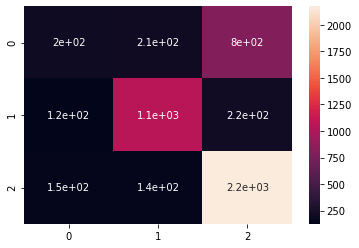

In [ ]:
sns.heatmap(confused,annot=True)

* 199 draws were accurately, 207 were predicted as a loss while 803 were predicted as a win
* 125 losses were predicted as a draw ,1057 were accurately predicted while 217 were predicted as wins 
* 147 wins were predicted as draws,142 as losses while 2175 were accurately predicted

## Evaluating the solution

> There is room for improvement for the models especiallty in the logistic model for instance when predicting draws more were predicted wrong.

## Conclusion


>From the polynomial models we can say teams prevail more in their home grounds